In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PyUncertainNumber.pba.pbox_base import Pbox
from PyUncertainNumber.pba.cbox import *

In [2]:
from PyUncertainNumber.pba.cbox.cbox import *
import random
random.seed(30)

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Bernoulli

In [ ]:
bdata = np.random.uniform(size=25) > 0.35

In [ ]:
cbox_bernoulli = CBbernoulli_p(bdata)

In [ ]:
cbox_bernoulli

In [ ]:
_ = cbox_bernoulli.display(style='band', parameter_name='Bernoulli p')

In [ ]:
# nextvalue
nextvalue_bernoulli = CBbernoulli(bdata)

In [ ]:
nextvalue_bernoulli

In [ ]:
_ = nextvalue_bernoulli.display(style='band', title='pbox for Bernoulli next value')

### Bionomial ND

In [ ]:
# Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.
# get a sample named `d` from a binomial of n=12, p=0.6
d = np.random.binomial(12, 0.6, 5)
# d


In [ ]:
d

In [ ]:
cbox_binomial = CBbinomial_p(d, 12)

In [ ]:
cbox_binomial

In [ ]:
_ = cbox_binomial.display(style='band', parameter_name='Bionomial p')

In [ ]:
# nextvalue
nextvalue_bernoulli = CBbinomial(d, 12)

In [ ]:
nextvalue_bernoulli

In [ ]:
_ = nextvalue_bernoulli.display(style='band', title='pbox for Bionomial next value')

### Possion

In [ ]:
idata = np.round(np.random.uniform(size=25) * 16)
# idata

In [ ]:
cbox_poisson = CBpoisson_mean(idata)

In [ ]:
_ = cbox_poisson.display(style='band', parameter_name = 'Poisson lambda')

In [ ]:
nextvalue_poisson = CBpoisson(idata)

In [ ]:
nextvalue_poisson

In [ ]:
_ = nextvalue_poisson.display(style='band', title='pbox for Poisson next value')

### Exponential

- note: lamba returns a confidence distribution as opposed to a cbox;
- nextvalue distribution is not analytic but sample based.

In [ ]:
data = np.random.uniform(size=25) * 30

In [ ]:
cbox_exponential = CBexponential_lambda(data)

In [ ]:
cbox_exponential

In [ ]:
nextvalue_exponential = CBexponential(data)

In [ ]:
# samples-based CDF
# nextvalue_exponential

### Gaussian

**Confidence distribution**

In [4]:
data = np.random.normal(size=25)

In [9]:
# mc_samples based cdf
scott_mu = CBnormal_mu(data, style='samples')

In [10]:
scott_mu.shape

(2000,)

In [11]:
''' verify if two old implementations of Leslie and Scott are the same 
indeed no point doing this as codes are de facto identical
'''
# scott_mu = CBnormal_mu(data)

# # leslie old style
# # leslie_mu = parameter_normal_mu(data, size=10000)
# np.isclose(scott_mu, leslie_mu)
# scott_mu - leslie_mu

' verify if two old implementations of Leslie and Scott are the same \nindeed no point doing this as codes are de facto identical\n'

In [13]:
x_support, analytical_mu = CBnormal_mu(data)

In [14]:
analytical_mu.shape

(2000,)

In [15]:
from scipy.stats import ecdf

def plot_ecdf(s, **kwargs):
    
    sth = ecdf(s)
    fig, ax = plt.subplots()
    # ax.plot(x_support, p_values, color='g')
    ax.step(sth.cdf.quantiles, sth.cdf.probabilities, color='red', zorder=10, **kwargs)
    return ax

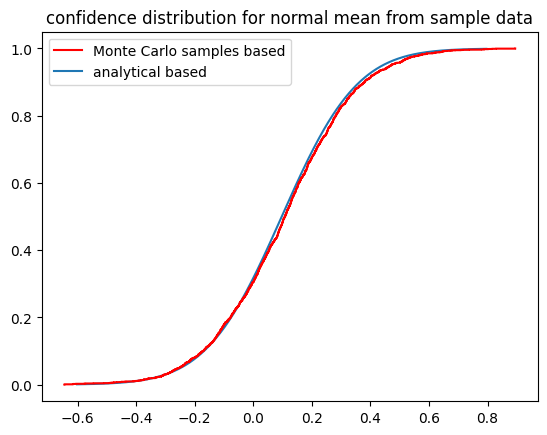

In [16]:
axe = plot_ecdf(scott_mu, label='Monte Carlo samples based')
axe.plot(x_support, analytical_mu, label='analytical based')
axe.set_title('confidence distribution for normal mean from sample data')
axe.legend()

In [ ]:
# Cbox for mu based on analytic solution

In [ ]:
# Cbox for mu based on samples-based solution

### Uniform

- sample based

# pool

In [ ]:
# p_values = np.linspace(0.01, 0.99, 200)
p_values = np.linspace(0.0001, 0.9999, 200)

In [ ]:
left_b = cdf2[0].ppf(p_values)

In [ ]:
# left_b

In [ ]:
right_b = cdf2[1].ppf(p_values)

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(left_b, p_values, 'x')
# ax.plot(right_b, p_values, '.')

In [ ]:
test_cbox = Pbox(
    left=left_b,
    right=right_b,
    steps=200,
    shape="beta",
)